# Cvika 2

In [1]:
print("ahoj")

ahoj


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pas_file_handling as pasfh
from pathlib import Path
from scipy import stats
import pas_graph as pasgr

import os
current_dir = os.getcwd()

import importlib
importlib.reload(pasgr)

<module 'pas_graph' from 'c:\\GitHub\\University-stuff-and-small-scale-projects\\1_University\\3_semestr\\pas\\pas_graph.py'>

In [ ]:

# -------------------------------
# Načtení dat
# -------------------------------

duvera_path = Path(f"{current_dir}\\python-rewrite\\duvera.csv")
cars_path   = Path(f"{current_dir}\\python-rewrite\\Cars93.csv")

if not duvera_path.exists():
    raise FileNotFoundError("Soubor 'duvera.csv' nebyl nalezen.")
duvera = pd.read_csv(duvera_path, encoding="utf-8")

if cars_path.exists():
    cars = pd.read_csv(cars_path, encoding="utf-8")
else:
    print("[UPOZORNĚNÍ] 'Cars93.csv' nebyl nalezen. Číselná část (Cars93) bude přeskočena.")
    cars = None



# -------------------------------
# Region - NUTS2 (nominální)
# -------------------------------

nuts2_labels = [
    "Praha", "Stredni Cechy", "Jihozapad", "Severozapad",
    "Severovychod", "Jihovychod", "Stredni Morava", "Moravskoslezsko"
]
nuts2_raw = duvera["NUTS2"]

# Pokud jsou hodnoty 1..8 → mapuj na labels. Jinak ponech textové hodnoty.
if pd.to_numeric(nuts2_raw, errors="coerce").dropna().between(1, 8).all():
    nuts2 = pd.to_numeric(nuts2_raw, errors="coerce").map({i+1: lab for i, lab in enumerate(nuts2_labels)})
else:
    nuts2 = nuts2_raw.astype(str).where(nuts2_raw.notna())

print("NUTS2 - unikátní hodnoty:")
print(pd.Series(nuts2).dropna().unique(), "\n")

freq_nuts2 = pasgr.freq_table(nuts2)
print("Regiony NUTS2 - četnosti:")
print(freq_nuts2, "\n")



# Grafy
counts_nuts2 = pd.Series(nuts2).value_counts().sort_index()
pasgr.bar_with_labels(counts_nuts2, "Cetnosti regionu CR")
props_nuts2 = (counts_nuts2 / counts_nuts2.sum()) if counts_nuts2.sum() else counts_nuts2.astype(float)
pasgr.pie_with_labels(props_nuts2, "Relativni cetnosti regionu CR")



NUTS2 - unikátní hodnoty:
['Jihozapad' 'Jihovychod' 'Severozapad' 'Severovychod' 'Moravskoslezsko'
 'Stredni Morava' 'Praha' 'Stredni Cechy'] 

Regiony NUTS2 - četnosti:
                 absolutni  relativni (%)
NUTS2                                    
Jihovychod             175          16.28
Jihozapad              141          13.12
Moravskoslezsko        115          10.70
Praha                  124          11.53
Severovychod           138          12.84
Severozapad             72           6.70
Stredni Cechy          164          15.26
Stredni Morava         146          13.58 



OV_1 - unikátní hodnoty:
['velmi spokojen', 'spíše spokojen', 'ani spokojen, ani nespokojen', 'spíše nespokojen', 'velmi nespokojen']
Categories (5, object): ['velmi spokojen' < 'spíše spokojen' < 'ani spokojen, ani nespokojen' < 'spíše nespokojen' < 'velmi nespokojen'] 

OV_1 - deskriptivní tabulka:
                              n(i)  N(i)  f(i)  F(i)
velmi spokojen                 192   192  0.18  0.18
spíše spokojen                 673   865  0.63  0.81
ani spokojen, ani nespokojen   154  1019  0.14  0.95
spíše nespokojen                46  1065  0.04  0.99
velmi nespokojen                 8  1073  0.01  1.00 



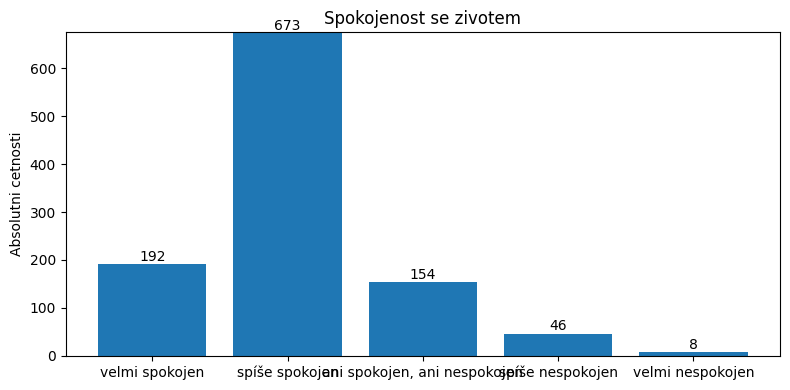

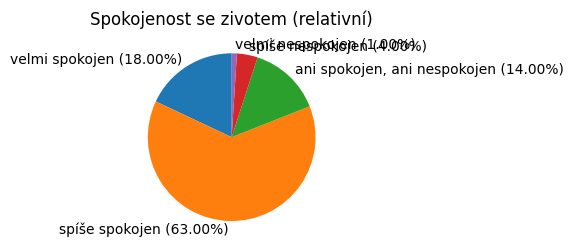

In [8]:

# -------------------------------
# Spokojenost se životem (OV_1) - ordinální, opravené mapování
# -------------------------------

ov1_labels = [
    "velmi spokojen", "spíše spokojen", "ani spokojen, ani nespokojen",
    "spíše nespokojen", "velmi nespokojen"
]
ov1_map = {i+1: lab for i, lab in enumerate(ov1_labels)}

ov_1_codes = pd.to_numeric(duvera["OV_1"], errors="coerce")
# Vezmi pouze 1..5, ostatní (0, 8, 9, 99…) → NaN
ov_1 = ov_1_codes.where(ov_1_codes.between(1, 5)).map(ov1_map)
ov_1 = pd.Categorical(ov_1, categories=ov1_labels, ordered=True)

print("OV_1 - unikátní hodnoty:")
print(pd.Series(ov_1).dropna().unique(), "\n")

ac_ov1 = pd.Series(ov_1).value_counts().reindex(ov1_labels, fill_value=0)
if ac_ov1.sum() == 0:
    print("OV_1 - deskriptivní tabulka: žádná validní 1..5 data po očištění.\n")
else:
    kac = ac_ov1.cumsum()
    rc = (ac_ov1 / ac_ov1.sum()).round(2)
    krc = rc.cumsum().round(2)
    tab_ov1 = pd.DataFrame({"n(i)": ac_ov1, "N(i)": kac, "f(i)": rc, "F(i)": krc})
    print("OV_1 - deskriptivní tabulka:")
    print(tab_ov1, "\n")

    pasgr.bar_with_labels(ac_ov1, "Spokojenost se zivotem")
    pasgr.pie_with_labels(rc, "Spokojenost se zivotem (relativní)")


Tabulka pohlaví × důvěra v média:
PI_1z  rozhodně důvěřuji  spíše důvěřuji  spíše nedůvěřuji  \
IDE_8                                                        
Muz                  123             224               101   
Zena                  91             269               135   

PI_1z  rozhodně nedůvěřuji  
IDE_8                       
Muz                     54  
Zena                    65   

Řádkové proporce (podíly v rámci pohlaví):
PI_1z  rozhodně důvěřuji  spíše důvěřuji  spíše nedůvěřuji  \
IDE_8                                                        
Muz                0.245           0.446             0.201   
Zena               0.162           0.480             0.241   

PI_1z  rozhodně nedůvěřuji  
IDE_8                       
Muz                  0.108  
Zena                 0.116   



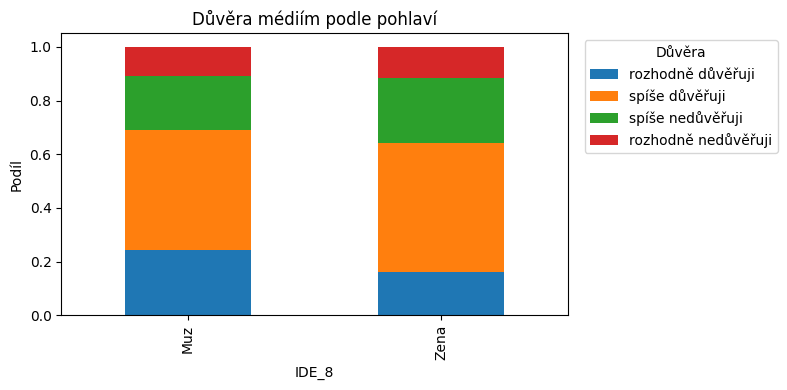

In [9]:

# -------------------------------
# Důvěra v média podle pohlaví
# -------------------------------

# pohlaví: 1 -> Muž, 2 -> Žena
pohlavi_codes = pd.to_numeric(duvera.get("IDE_8"), errors="coerce")
pohlavi = pohlavi_codes.map({1: "Muz", 2: "Zena"})

# PI_1z: ponech 1..4, ostatní NaN; mapuj na text
pi_labels = ["rozhodně důvěřuji", "spíše důvěřuji", "spíše nedůvěřuji", "rozhodně nedůvěřuji"]
pi_map = {i+1: lab for i, lab in enumerate(pi_labels)}
pi_codes = pd.to_numeric(duvera.get("PI_1z"), errors="coerce")
pi_clean = pi_codes.where(pi_codes.between(1, 4)).map(pi_map)

tab = pd.crosstab(pohlavi, pi_clean).reindex(columns=pi_labels, fill_value=0).dropna(how="all")
print("Tabulka pohlaví × důvěra v média:")
print(tab, "\n")

if tab.size and tab.to_numpy().sum() > 0:
    row_props = tab.div(tab.sum(axis=1), axis=0).fillna(0).round(3)
    print("Řádkové proporce (podíly v rámci pohlaví):")
    print(row_props, "\n")

    # [GRAF] Vstup: row_props
    pasgr.stacked_barplot(row_props, title="Důvěra médiím podle pohlaví", ylabel="Podíl", legend_title="Důvěra")
else:
    print("Kontingenční tabulka prázdná - zkontrolujte sloupce IDE_8 a PI_1z.\n")


In [10]:

# -------------------------------
# Číselné proměnné - Cars93 (pokud dataset existuje)
# -------------------------------
# Cylinders včetně 'rotary'
valce = cars["Cylinders"].astype(str)
ac_all = valce.value_counts().sort_index()
print("Cylinders - četnosti (včetně 'rotary'):")
print(ac_all, "\n")

# Bez 'rotary'
valce2 = valce[valce != "rotary"]
ac = valce2.value_counts().sort_index()
kac = ac.cumsum()
rc = (ac / ac.sum()).round(2) if ac.sum() else ac.astype(float)
krc = rc.cumsum().round(2) if ac.sum() else rc
tab_valce2 = pd.DataFrame({"n(i)": ac, "N(i)": kac, "f(i)": rc, "F(i)": krc})
print("Cylinders (bez 'rotary') - frekvenční rozdělení:")
print(tab_valce2, "\n")

Cylinders - četnosti (včetně 'rotary'):
Cylinders
3          3
4         49
5          2
6         31
8          7
rotary     1
Name: count, dtype: int64 

Cylinders (bez 'rotary') - frekvenční rozdělení:
           n(i)  N(i)  f(i)  F(i)
Cylinders                        
3             3     3  0.03  0.03
4            49    52  0.53  0.56
5             2    54  0.02  0.58
6            31    85  0.34  0.92
8             7    92  0.08  1.00 



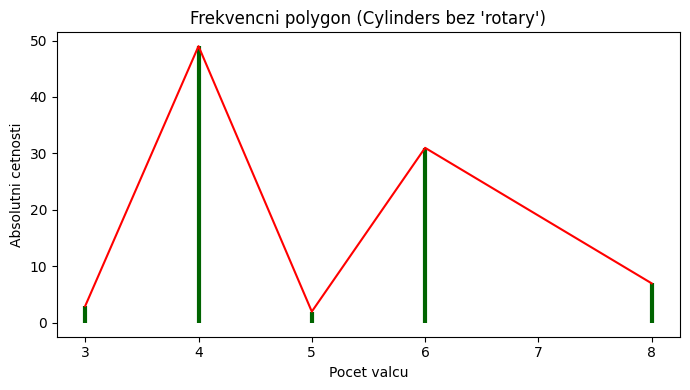

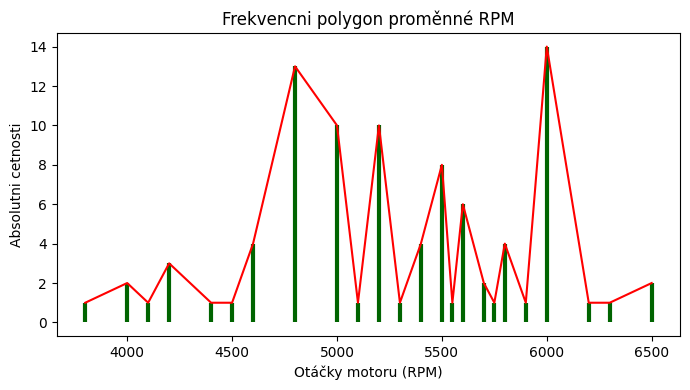

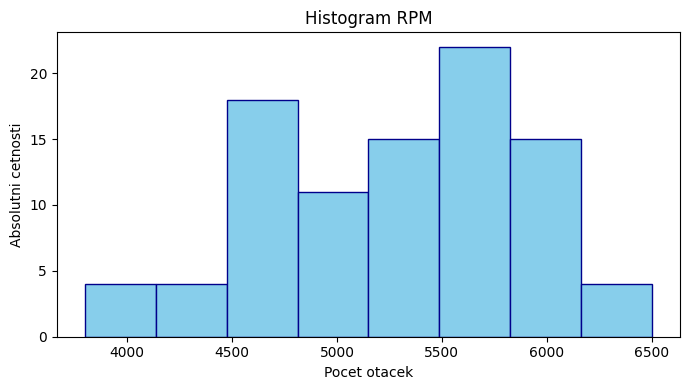

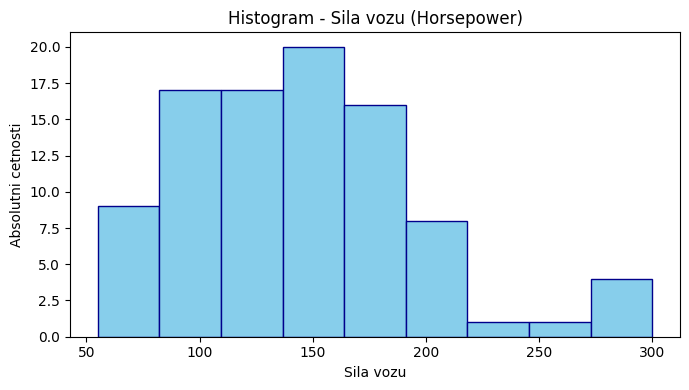

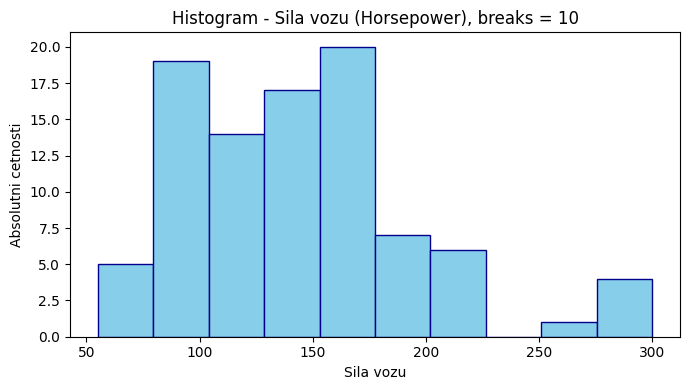

In [11]:

# Frekvenční polygon pro valce2
# Pouze hodnoty, které lze převést na číslo:
x_vals = pd.to_numeric(ac.index, errors="coerce")
mask = ~x_vals.isna()
pasgr.freq_polygon(x_vals[mask], ac.values[mask], "Frekvencni polygon (Cylinders bez 'rotary')", "Pocet valcu")

# RPM - polygon + histogram
rpm = pd.to_numeric(cars["RPM"], errors="coerce").dropna()
ac_rpm = rpm.value_counts().sort_index()
pasgr.freq_polygon(ac_rpm.index, ac_rpm.values, "Frekvencni polygon proměnné RPM", "Otáčky motoru (RPM)")

pasgr.histogram_with_labels(rpm, title="Histogram RPM", bins="auto", color="skyblue", edgecolor="darkblue", xlabel="Pocet otacek", ylabel="Absolutni cetnosti")

# Horsepower (hp) - histogramy, frekvenční rozdělení, boxploty, kvantily
hp = pd.to_numeric(cars["Horsepower"], errors="coerce").dropna()

# [GRAF] Vstup: hp
pasgr.histogram_with_labels(hp, title="Histogram - Sila vozu (Horsepower)", bins="auto", color="skyblue", edgecolor="darkblue", xlabel="Sila vozu", ylabel="Absolutni cetnosti")

# [GRAF] Vstup: hp
pasgr.histogram_with_labels(hp, title="Histogram - Sila vozu (Horsepower), breaks = 10", bins=10, color="skyblue", edgecolor="darkblue", xlabel="Sila vozu", ylabel="Absolutni cetnosti")



In [12]:
# [GRAF] Vstup: ac_hp
# Histogram summary table (not a plot, but related)
counts, breaks = np.histogram(hp, bins=10)
labels = [f"({breaks[i]:.0f}, {breaks[i+1]:.0f}]" for i in range(len(breaks)-1)]
ac_hp = pd.Series(counts, index=labels)
kac_hp = ac_hp.cumsum()
rc_hp = (ac_hp / ac_hp.sum()).round(3) if ac_hp.sum() else ac_hp.astype(float)
krc_hp = rc_hp.cumsum().round(3) if ac_hp.sum() else rc_hp
freq_hp = pd.DataFrame({"n(i)": ac_hp, "N(i)": kac_hp, "f(i)": rc_hp, "F(i)": krc_hp})
print("Horsepower - frekvenční rozdělení podle histogramu (10 tříd):")
print(freq_hp, "\n")

# Length - histogram + summary
length = pd.to_numeric(cars["Length"], errors="coerce").dropna()
print("Length - summary:")
print(length.describe(), "\n")

Horsepower - frekvenční rozdělení podle histogramu (10 tříd):
            n(i)  N(i)   f(i)   F(i)
(55, 80]       5     5  0.054  0.054
(80, 104]     19    24  0.204  0.258
(104, 128]    14    38  0.151  0.409
(128, 153]    17    55  0.183  0.592
(153, 178]    20    75  0.215  0.807
(178, 202]     7    82  0.075  0.882
(202, 226]     6    88  0.065  0.947
(226, 251]     0    88  0.000  0.947
(251, 276]     1    89  0.011  0.958
(276, 300]     4    93  0.043  1.001 

Length - summary:
count     93.000000
mean     183.204301
std       14.602382
min      141.000000
25%      174.000000
50%      183.000000
75%      192.000000
max      219.000000
Name: Length, dtype: float64 



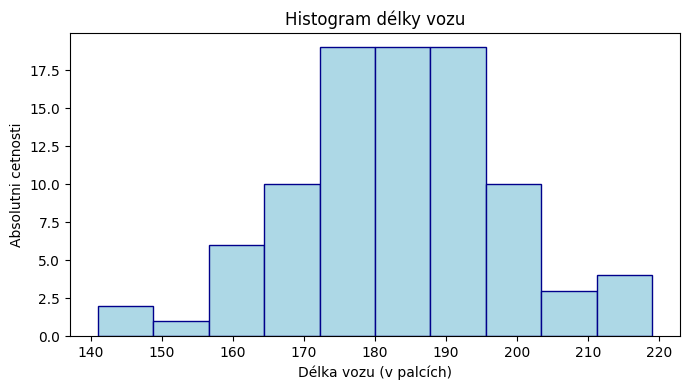

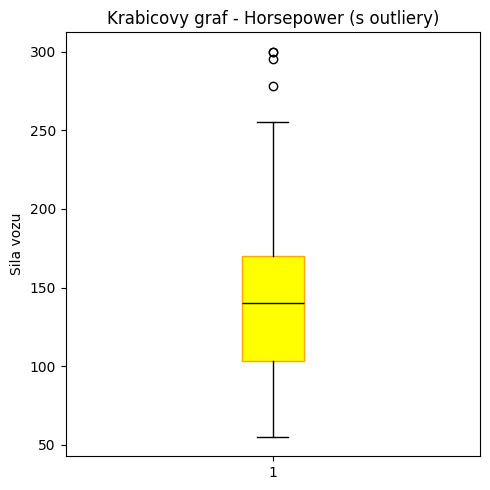

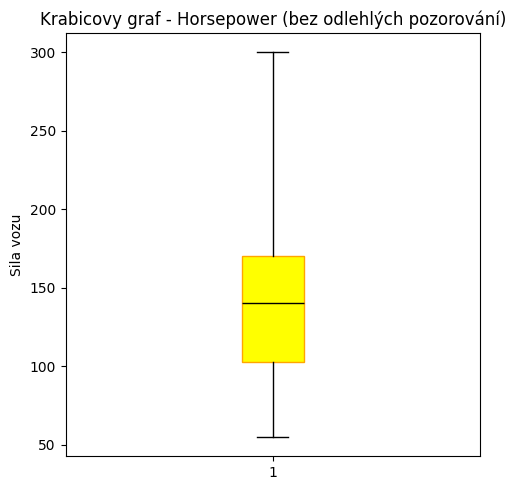

In [13]:
pasgr.histogram_with_labels(length, title="Histogram délky vozu", bins=10, color="lightblue", edgecolor="darkblue", xlabel="Délka vozu (v palcích)", ylabel="Absolutni cetnosti")


# [GRAF] Vstup: hp
pasgr.boxplot_with_labels(hp, title="Krabicovy graf - Horsepower (s outliery)", ylabel="Sila vozu", color="yellow", edgecolor="orange", median_color="black", showfliers=True)


# Bez odlehlých (whis=3 ~ range=3 v R)
pasgr.boxplot_with_labels(hp, title="Krabicovy graf - Horsepower (bez odlehlých pozorování)", ylabel="Sila vozu", color="yellow", edgecolor="orange", median_color="black", showfliers=False, whis=3)


hp - min: 55.0
hp - max: 300.0
hp - Q1 (0.25): 103.0
hp - Q3 (0.75): 170.0
hp - median: 140.0
hp - five-number summary [min, Q1, median, Q3, max]:
[55.0, 103.0, 140.0, 170.0, 300.0] 

hp - mean: 143.8279569892473
hp - summary() ekvivalent:
count     93.000000
mean     143.827957
std       52.374410
min       55.000000
25%      103.000000
50%      140.000000
75%      170.000000
max      300.000000
Name: Horsepower, dtype: float64 

Length - summary:
count     93.000000
mean     183.204301
std       14.602382
min      141.000000
25%      174.000000
50%      183.000000
75%      192.000000
max      219.000000
Name: Length, dtype: float64 



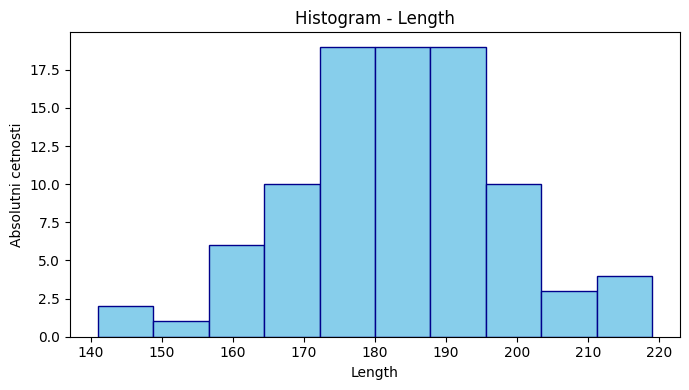

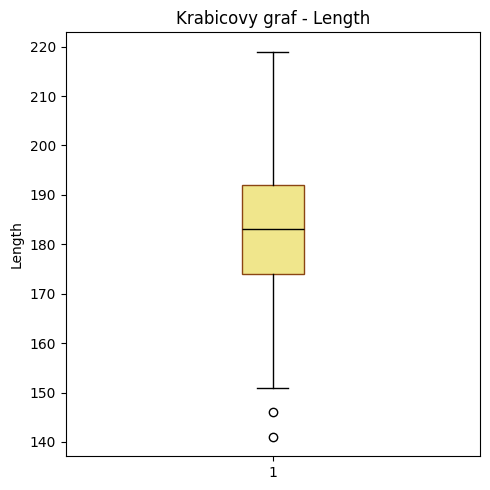

Price - summary:
count    93.000000
mean     19.509677
std       9.659430
min       7.400000
25%      12.200000
50%      17.700000
75%      23.300000
max      61.900000
Name: Price, dtype: float64 



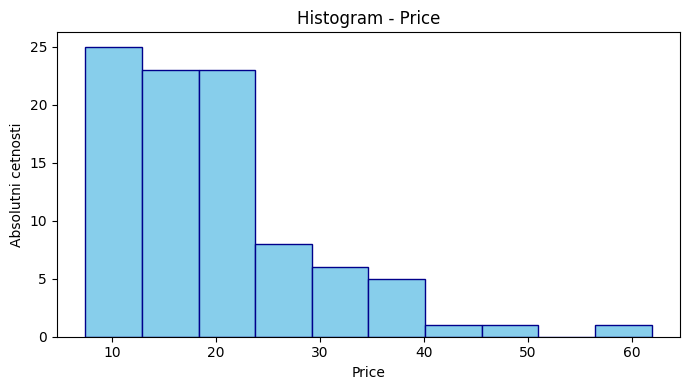

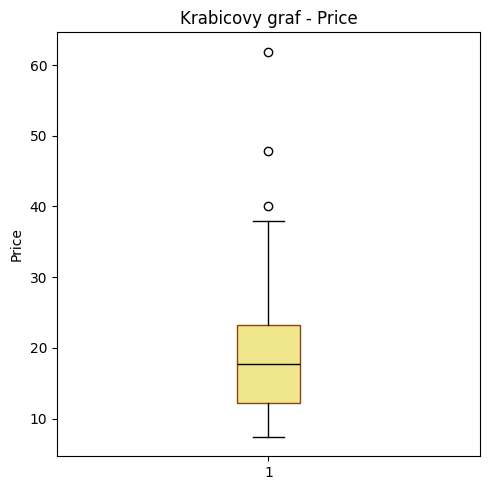

Weight - summary:
count      93.000000
mean     3072.903226
std       589.896510
min      1695.000000
25%      2620.000000
50%      3040.000000
75%      3525.000000
max      4105.000000
Name: Weight, dtype: float64 



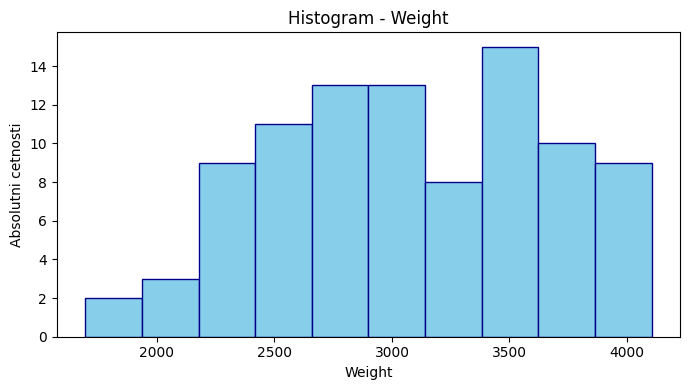

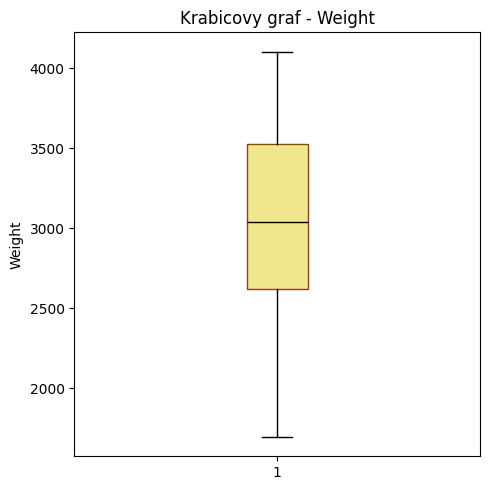

Cena podle původu (groupby/summary):
         count       mean        std  min     25%   50%     75%   max
Origin                                                               
USA       48.0  18.572917   7.816914  7.4  13.475  16.3  20.725  40.1
non-USA   45.0  20.508889  11.306752  8.0  11.600  19.1  26.700  61.9 



In [14]:
# Kvantily, pěticíslo, průměr, summary
print("hp - min:", float(hp.min()))
print("hp - max:", float(hp.max()))
print("hp - Q1 (0.25):", float(hp.quantile(0.25)))
print("hp - Q3 (0.75):", float(hp.quantile(0.75)))
print("hp - median:", float(hp.median()))
five_num = [float(hp.min()), float(hp.quantile(0.25)), float(hp.median()),
            float(hp.quantile(0.75)), float(hp.max())]
print("hp - five-number summary [min, Q1, median, Q3, max]:")
print(five_num, "\n")
print("hp - mean:", float(hp.mean()))
print("hp - summary() ekvivalent:")
print(hp.describe(), "\n")

# Další proměnné: Length, Price, Weight
for var in ["Length", "Price", "Weight"]:
    s = pd.to_numeric(cars[var], errors="coerce").dropna()
    print(f"{var} - summary:")
    print(s.describe(), "\n")

    pasgr.histogram_with_labels(s, title=f"Histogram - {var}", bins=10, color="skyblue", edgecolor="darkblue", xlabel=var, ylabel="Absolutni cetnosti")


    pasgr.boxplot_with_labels(s, title=f"Krabicovy graf - {var}", ylabel=var, color="khaki", edgecolor="saddlebrown", median_color="black")

# Porovnání skupin - cena podle původu
if "Origin" in cars.columns and "Price" in cars.columns:
    puvod = cars["Origin"]
    cena = pd.to_numeric(cars["Price"], errors="coerce")
    grp_summary = cena.groupby(puvod).describe()
    print("Cena podle původu (groupby/summary):")
    print(grp_summary, "\n")
